In [117]:
import h5py
import network_predictions
import os
import matplotlib.pyplot as plt
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import pandas as pd
import matplotlib.colors as mpc
import corner
from matplotlib.patches import Patch
import astropy.visualization as asviz
import tensorflow as tf
import paltas.Analysis.dataset_generation as dg

import matplotlib
SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 25


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
from IPython.utils import io
root_path = paltas.__path__[0][:-7]

from mpl_toolkits.axes_grid1 import make_axes_locatable


In [105]:
path_to_weights = 'NLNORM/model_weights3/_23--1.86_best.h5'
path_to_norms = 'generated_images/no_lens/config_LSST/norms.csv'
results_folder = 'NLNORM'

In [106]:
trained = network_predictions.NetworkPredictions(path_to_model_weights=path_to_weights,
                                                 path_to_model_norms=path_to_norms,
                                                 learning_params=None,
                                                 loss_type='diag',
                                                 model_type='xresnet34',
                                                 norm_type='stdnorm')

In [107]:
# trained.model is gonna take all the inputs, do all the calculations and gives you output on your test object
# it is the trained nn
# precision is inverse of covariance matrix

with io.capture_output() as captured:

    y_test, y_pred, std_pred, prec_pred, log_var_pred = trained.gen_network_predictions('generated_images/test/config_LSST_catalog/',samples=False,shuffle=False);

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('kwargs_detector', 'learning_params', 'log_learning_params', 'log_norm_images', 'noise_function', 'norm_dict', 'norm_images', 'std_norm_images'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [109]:
y_test[:,0]

array([1.069203 , 1.4667774, 1.2199596, ..., 0.7650337, 0.8068223,
       0.6710785], dtype=float32)

In [ ]:
img_losses = []
for i in range(1556):
    name = '0'*(7-len(str(i))) + str(i)
    img = np.load(f'generated_images/test/config_LSST_catalog/image_{name}.npy')
    imgtf = tf.convert_to_tensor(img.reshape(1, 33,33, 1))
    imgloss = trained.loss_single_image (y_test[i, :], imgtf)
    img_losses.append(imgloss)

In [110]:
test_data = pd.read_csv('generated_images/test/config_LSST_catalog/metadata.csv',usecols=np.arange(9,61)) 

In [120]:
config_file = 'config_LSST_catalog'

In [130]:
read_in_data = pd.read_csv('data/deflectors.csv', index_col=0)

In [132]:
read_in_data

,LENSID,FLAGTYPE,NIMG,ZLENS,VELDISP,ELLIP,PHIE,GAMMA,PHIG,ZSRC,...,stellar_mass_bulge_log,stellar_mass_disk_log,halo_mass_log,EINSTEIN,e1_mass,e2_mass,e1_light,e2_light,gamma1,gamma2
3,31148653,0,2,1.016,280.5434,0.281612,91.638680,0.049493,-28.94337,2.05,...,11.327537,-2.558152,13.404356,0.823867,0.163613,0.009369,-0.305842,-0.017513,0.026310,-0.041920
4,350831,0,2,0.186,209.8940,0.162288,-129.310700,0.023032,113.06560,1.78,...,10.808717,9.582794,12.352448,1.069203,0.017423,-0.086574,-0.033883,0.168365,-0.015962,-0.016605
5,4789516,0,2,0.476,221.8196,0.073489,148.768700,0.032160,67.83229,1.29,...,10.842839,-0.748321,12.199332,0.768551,-0.017636,0.033825,0.038469,-0.073780,-0.023003,0.022476
7,1215224,0,4,0.288,233.8837,0.340546,-136.346400,0.033537,-39.73777,2.92,...,10.933130,7.997236,12.291071,1.286778,-0.009641,-0.204989,0.015469,0.328898,0.006126,-0.032973
9,10798336,0,2,0.652,203.2357,0.461355,-16.851680,0.056664,55.53548,1.32,...,10.840506,9.541715,14.522403,0.489150,-0.249448,0.166382,0.397055,-0.264836,-0.020372,0.052875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,29106493,0,2,0.986,227.5097,0.164940,104.594200,0.061555,-154.18120,2.34,...,11.075373,7.621138,12.655476,0.625790,0.078469,0.043834,-0.146859,-0.082038,0.038203,0.048265
2804,5337421,0,2,0.496,228.0342,0.264508,-0.344299,0.040356,-138.16740,2.55,...,10.831672,9.721578,12.854919,1.020315,-0.152400,0.001832,0.265482,-0.003191,0.004453,0.040110
2809,21219638,0,2,0.860,296.4831,0.058690,8.432822,0.071142,-43.29349,2.68,...,11.412108,7.010972,13.516719,1.293439,-0.028932,-0.008771,0.042378,0.012848,0.004235,-0.071016
2811,32385282,0,2,1.034,225.9436,0.036238,-25.338560,0.031332,105.66190,2.92,...,11.031167,0.038594,13.086989,0.677326,-0.011694,0.014275,0.022323,-0.027251,-0.026765,-0.016289


In [135]:
read_in_data[np.isclose(read_in_data['EINSTEIN'],1.069203)]

,LENSID,FLAGTYPE,NIMG,ZLENS,VELDISP,ELLIP,PHIE,GAMMA,PHIG,ZSRC,...,stellar_mass_bulge_log,stellar_mass_disk_log,halo_mass_log,EINSTEIN,e1_mass,e2_mass,e1_light,e2_light,gamma1,gamma2
4,350831,0,2,0.186,209.894,0.162288,-129.3107,0.023032,113.0656,1.78,...,10.808717,9.582794,12.352448,1.069203,0.017423,-0.086574,-0.033883,0.168365,-0.015962,-0.016605


In [136]:
from paltas.Configs.config_handler import ConfigHandler

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,f'paltas/notebooks/{config_file}.py'), index=4)

# First let's get the lenstronomy model lists, kwargs lists, and redshift lists.
kwargs_model, kwargs_params = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print(kwargs_params.keys())
print('')

print('lens_model_list')
print(kwargs_model['lens_model_list'])
print('kwargs_lens')
print()
print(kwargs_params['kwargs_lens_light'])


Available Keys:
dict_keys(['lens_model_list', 'lens_redshift_list', 'lens_light_model_list', 'point_source_model_list', 'source_light_model_list', 'source_redshift_list', 'multi_plane', 'z_source', 'z_source_convention'])
dict_keys(['kwargs_lens', 'kwargs_lens_light', 'kwargs_ps', 'kwargs_source'])

lens_model_list
['EPL_NUMBA', 'SHEAR']
kwargs_lens

[{'R_sersic': 0.8547239, 'center_x': 0, 'center_y': 0, 'e1': -0.0338829042352158, 'e2': 0.1683650071105145, 'n_sersic': 4.0, 'amp': 343.6140038547163}]


In [137]:
img, prop = config_handler.draw_image(new_sample=True)

In [143]:
for i in trained.learning_params:
    print(f'{i} : {prop[i]}')

main_deflector_parameters_theta_E : 1.069203006204712
main_deflector_parameters_gamma1 : -0.0159615577779007
main_deflector_parameters_gamma2 : -0.0166046003481064
main_deflector_parameters_gamma : 2.06781132166228
main_deflector_parameters_e1 : 0.0174227481958257
main_deflector_parameters_e2 : -0.0865740759266477
main_deflector_parameters_center_x : 0
main_deflector_parameters_center_y : 0


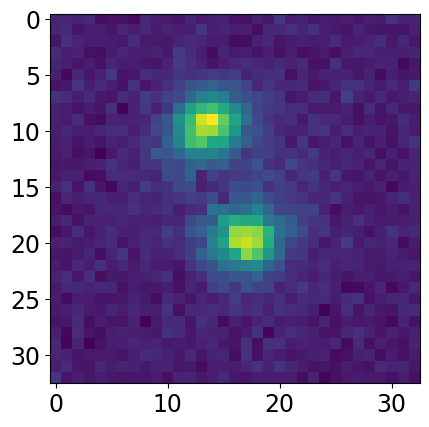

In [140]:
imagestd = dg.standard_norm_image(img)
plt.imshow(imagestd)

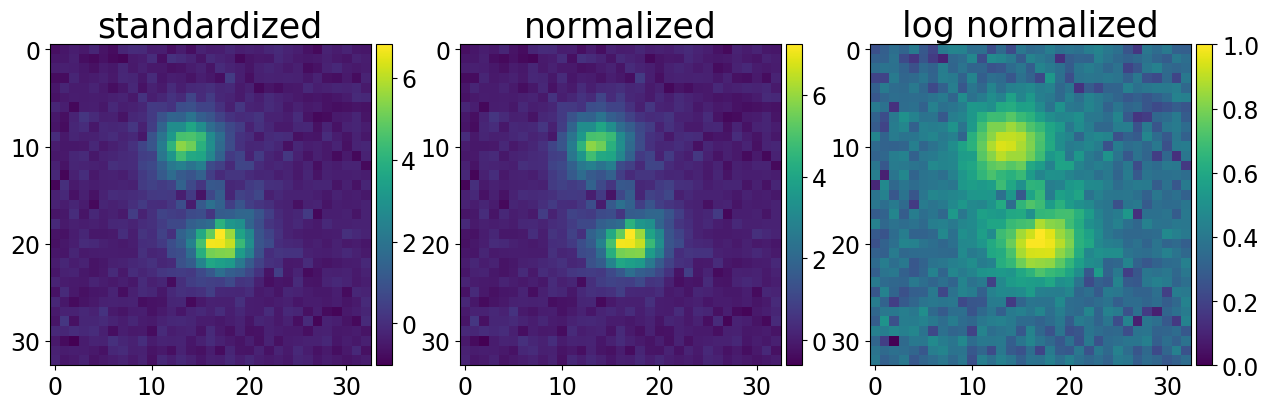

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#ind = np.random.choice(1557)
ind=0
name = '%07d'%(ind)
image = np.load(f'generated_images/test/config_LSST_catalog/image_{name}.npy')

imagestd = dg.standard_norm_image(image)
im0=ax[0].imshow(imagestd)
ax[0].set_title("standardized")
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

imagenorm = dg.norm_image(image)
im1 = ax[1].imshow(imagenorm)
ax[1].set_title('normalized')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

imagelog = dg.log_norm_image(image)
im2 = ax[2].imshow(imagelog)
ax[2].set_title('log normalized')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

(array([ 22., 266., 308., 153.,  75.,  42.,  39.,  25.,  21.,  14.,  11.,
          8.,   5.,   8.,   7.,   9.,   3.,   5.,   5.,   4.,   2.,   5.,
          1.,   6.,   2.,   1.,   2.,   1.,   4.,   3.,   2.,   1.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   3.,   0.,
          0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([-1.00668684, -0.43896749,  0.12875186,  0.6964712 ,  1.26419055,
         1.8319099 ,  2.39962924,  2.96734859,  3.53506794,  4.10278728,
         4.67050663,  5.23822598,  5.80594532,  6.37366467,  6.94138402,
         7.50910336,  8.07682271,  8.64454206,  9.2122614 ,  9.77998075,
        10.3477001 , 10.91

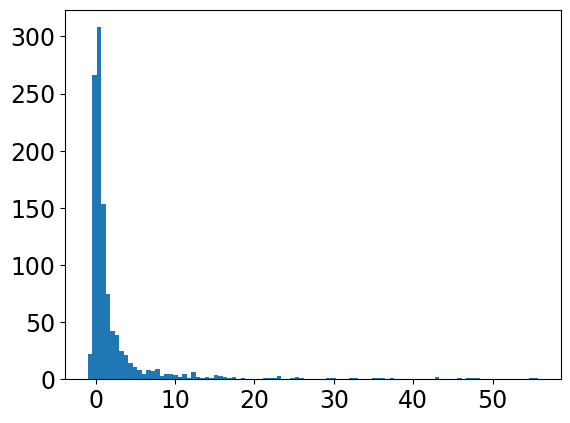

In [79]:
image_flat = image.flatten()
plt.hist(image_flat, bins=100)

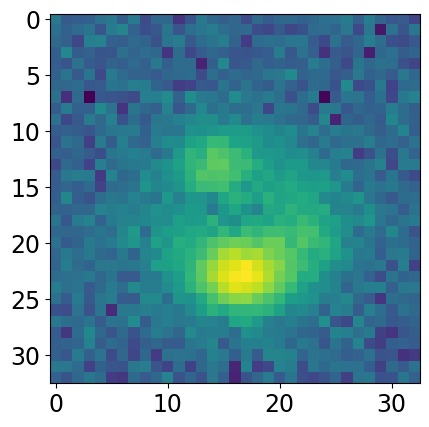

In [99]:
image = np.load(f'generated_images/test/config_LSST_catalog/image_0000038.npy')
image = tf.experimental.numpy.log10(1+image)
image = (image - tf.math.reduce_min(image))/(tf.math.reduce_max(image) - tf.math.reduce_min(image))
plt.imshow(image)
#
	# rescale to range [0,1]
# image = (image - tf.math.reduce_min(image)) / (
# 		tf.math.reduce_max(image)- tf.math.reduce_min(image))

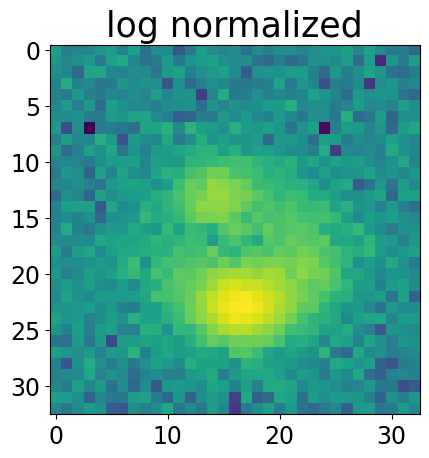

In [89]:
imagelog = dg.log_norm_image(image)
im2 = plt.imshow(imagelog)
plt.title('log normalized')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')